# Introduction

## Variables

### Mutability

In [41]:
my_int = 10 # immutable
my_list = [1, 2, 3] # mutable

my_list_id = id(my_list)

print(hex(id(my_int)))
print(hex(my_list_id))

0xb35ac8
0x7aeca80d8600


In [42]:
my_int_too = my_int

assert id(my_int_too) == id(my_int) # same memory address

my_int_too = 20
assert id(my_int_too) != id(my_int) # immutable types get new memory address

my_list.append(4)
assert id(my_list) == my_list_id # mutable types keep the same memory address

my_list = [4, 5, 6]
assert id(my_list) != my_list_id # new list, new memory address

my_int_too = my_list # variable can be reassigned from immutable to mutable
assert id(my_int_too) == id(my_list)

### Integer Interning

In [8]:
my_int = 10
my_array = [10, 20, 30]

print(id(my_int) == id(my_array))
print(f"Int: {id(my_int)}")
print(f"Array: {id(my_array)}")

False
Int: 11754184
Array: 136904165883776


In [2]:
a = 10
b = 10

x = int("10")
y = int("10")

print(id(a), id(b), id(x), id(y)) # point to Singleton 10 integer object

11758280 11758280 11758280 11758280


In [7]:
def get_half(n: str) -> int:
    return int(n) / 2

x = get_half("20")  # Created float from a string
y = get_half("20")  # Another float created from a string

print(x,y) # 10.0 10.0 # Same values

# Different memory addresses due to being floats
print(id(x), id(y))  # Different memory addresses
print(type(x), type(y))

# converted to an int, will point to same memory address
print(id(int(x)), id(int(y)))  # Same memory addresses


10.0 10.0
126656063300720 126656063059472
<class 'float'> <class 'float'>
11758280 11758280


### Peephole Optimisation

In [11]:
def my_func(e):
    a = (1, 2) * 3 # will be expanded to (1, 2, 1, 2, 1, 2)
    b = 'abc' * 2 # will be expanded to 'abcabc'
    if e in [1, 2, 3]: # [1, 2, 3] will be converted to immutable (1, 2, 3)
        pass
    if e in {4, 5, 6}: # {4, 5, 6} will be converted to immutable frozenset({4, 5, 6})
        pass

my_func.__code__.co_consts # peephole optimisations

(None, (1, 2, 1, 2, 1, 2), 'abcabc', (1, 2, 3), frozenset({4, 5, 6}))

### `None` Object

In [9]:
my_int = None
my_array = None
print(id(my_int) == id(my_array))
print(f"Int (None): {id(my_int)}")
print(f"Array (None): {id(my_array)}")

True
Int (None): 10746016
Array (None): 10746016


In [14]:
print(None is False) # False
print(None == False) # False
if not None:
    print("None evaluates to False in boolean context")

False
False
None evaluates to False in boolean context


### Garbage Collection

In [26]:
import ctypes
import gc

def ref_count(address):
    return ctypes.c_long.from_address(address).value

def object_by_id(object_id):
    for obj in gc.get_objects():
        if id(obj) == object_id:
            return "Object exists"
    return "Not found"

In [27]:
class A:
    def __init__(self):
        self.b = B(self)
        print(f"A: self: {hex(id(self))}, b: {hex(id(self.b))}")

class B:
    def __init__(self, a):
        self.a = a
        print(f"B: self: {hex(id(self))}, a: {hex(id(self.a))}")

In [28]:
gc.disable()

my_var = A() # circular reference created

print(f"my_var: {hex(id(my_var))}")
print(f"my_var's b: {hex(id(my_var.b))}")
print(f"my_var's b's a: {hex(id(my_var.b.a))}") # should be same memory as my_var

a_id = id(my_var)
b_id = id(my_var.b)

B: self: 0x7aeca8563080, a: 0x7aeca8562d80
A: self: 0x7aeca8562d80, b: 0x7aeca8563080
my_var: 0x7aeca8562d80
my_var's b: 0x7aeca8563080
my_var's b's a: 0x7aeca8562d80


In [29]:
assert ref_count(a_id) == 2
assert ref_count(b_id) == 1

assert object_by_id(a_id) == 'Object exists'
assert object_by_id(b_id) == 'Object exists'

In [30]:
my_var = None # destroy the reference

# objects aren't deleted as the garbage collector is disabled
assert ref_count(a_id) == 1
assert ref_count(b_id) == 1
assert object_by_id(a_id) == 'Object exists'
assert object_by_id(b_id) == 'Object exists'

In [32]:
gc.collect()
assert object_by_id(a_id) == 'Not found'
assert object_by_id(b_id) == 'Not found'

print(ref_count(b_id)) # these memory addresses could be reassigned
print(ref_count(a_id))

1
11753828


## NumPy Arrays

In [39]:
import numpy as np

In [3]:
# initialise a numpy array
arr1 = np.array([1, 2, 3, 4, 5])
print(f"{arr1} | type: {type(arr1)} : dtype: {arr1.dtype} | shape: {arr1.shape} | ndim: {arr1.ndim}| size: {arr1.size}")

# slice arrays
print(f"[0:1]: {arr1[0:1]}")
print(f"[1:2]: {arr1[1:2]}")
print(f"[1:3]: {arr1[1:3]}")
print(f"[:3]: {arr1[:3]}")
print(f"[2:]: {arr1[2:]}")

[1 2 3 4 5] | type: <class 'numpy.ndarray'> : dtype: int64 | shape: (5,) | ndim: 1| size: 5
[0:1]: [1]
[1:2]: [2]
[1:3]: [2 3]
[:3]: [1 2 3]
[2:]: [3 4 5]


In [4]:
# arrays must have homogenous dtypes so integers are converted to float
arr2 = np.array([0.5, 1, 1.5, 2, 2.5])
print(f"{arr2} | type: {type(arr2)} : dtype: {arr2.dtype} | shape: {arr2.shape} | ndim: {arr2.ndim}| size: {arr2.size}")

[0.5 1.  1.5 2.  2.5] | type: <class 'numpy.ndarray'> : dtype: float64 | shape: (5,) | ndim: 1| size: 5


In [5]:
# multi-dimensional arrays
arr3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"{arr3} | type: {type(arr3)} : dtype: {arr3.dtype} | shape: {arr3.shape} | ndim: {arr3.ndim}| size: {arr3.size}")
# index and slice multi-dimension arrays
print(f"[1][2]: {arr3[1][2]}")
print(f"[0:2]: {arr3[0:2]}")
print(f"[0:2][1]: {arr3[0:2][1]}")
print(f"[1][0:2]: {arr3[1][0:2]}")

[[1 2 3]
 [4 5 6]
 [7 8 9]] | type: <class 'numpy.ndarray'> : dtype: int64 | shape: (3, 3) | ndim: 2| size: 9
[1][2]: 6
[0:2]: [[1 2 3]
 [4 5 6]]
[0:2][1]: [4 5 6]
[1][0:2]: [4 5]


In [6]:
# reshaping arrays
arr4 = arr1.reshape([5,1])
print(f"{arr4} | type: {type(arr4)} : dtype: {arr4.dtype} | shape: {arr4.shape} | ndim: {arr4.ndim}| size: {arr4.size}")

[[1]
 [2]
 [3]
 [4]
 [5]] | type: <class 'numpy.ndarray'> : dtype: int64 | shape: (5, 1) | ndim: 2| size: 5


In [7]:
# operations on arrays
print(arr1)
print(arr2)

print(f"Add: {arr1 + arr2}")
print(f"Subtract: {arr1 - arr2}")
print(f"Multiply: {arr1 * arr2}")
print(f"Divide: {arr1 / arr2}")

[1 2 3 4 5]
[0.5 1.  1.5 2.  2.5]
Add: [1.5 3.  4.5 6.  7.5]
Subtract: [0.5 1.  1.5 2.  2.5]
Multiply: [ 0.5  2.   4.5  8.  12.5]
Divide: [2. 2. 2. 2. 2.]


## Pandas

In [3]:
import pandas as pd

### Series

In [4]:
primes = pd.Series([2, 3, 5, 7, 11, 13, 17, 19])
primes

0     2
1     3
2     5
3     7
4    11
5    13
6    17
7    19
dtype: int64

In [16]:
print(primes[4])

11


In [18]:
print(primes[0:4])

0    2
1    3
2    5
3    7
dtype: int64


In [28]:
primes > 10

0    False
1    False
2    False
3    False
4     True
5     True
6     True
7     True
dtype: bool

In [23]:
factors = pd.Series([2, 2, 2, 2, 2, 2, 2, 2])
factors

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
dtype: int64

In [25]:
primes + factors

0     4
1     5
2     7
3     9
4    13
5    15
6    19
7    21
dtype: int64

### Working with Financial Data

In [11]:
rawSP = pd.read_csv("../mock_data/GSPC.csv", sep=',', index_col="Date", header=0, parse_dates=True)
print(type(rawSP))
rawSP

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000
2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000


In [14]:
SP_close = rawSP['Close']
print(type(SP_close))
SP_close

<class 'pandas.core.series.Series'>


Date
1927-12-30      17.660000
1928-01-03      17.760000
1928-01-04      17.719999
1928-01-05      17.549999
1928-01-06      17.660000
                 ...     
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
2019-12-31    3230.780029
Name: Close, Length: 23109, dtype: float64

In [16]:
SP_close.index

DatetimeIndex(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05',
               '1928-01-06', '1928-01-09', '1928-01-10', '1928-01-11',
               '1928-01-12', '1928-01-13',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=23109, freq=None)

<Axes: xlabel='Date'>

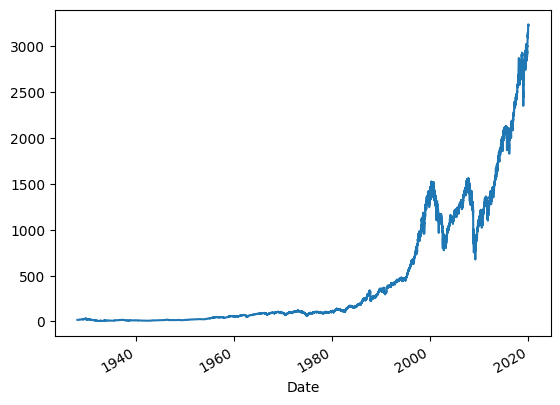

In [18]:
SP_close.plot()

In [24]:
SP_close["2010-05-28"]

1089.410034

<class 'pandas.core.series.Series'>
Date
1940-01-02    12.630000
1940-01-03    12.770000
1940-01-04    12.730000
1940-01-05    12.660000
1940-01-08    12.670000
                ...    
1949-12-23    16.639999
1949-12-27    16.580000
1949-12-28    16.660000
1949-12-29    16.680000
1949-12-30    16.790001
Name: Close, Length: 2500, dtype: float64


<Axes: xlabel='Date'>

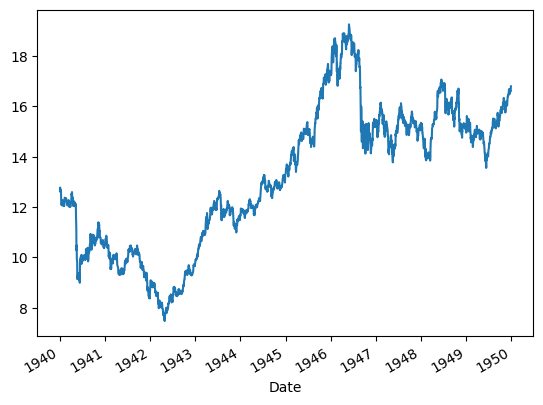

In [30]:
SP_close_40s = SP_close["1940-01-01":"1949-12-31"]
print(type(SP_close_40s))
print(SP_close_40s)
SP_close_40s.plot()

Date
1927-12-30    17.660000
1928-01-03    17.760000
1928-01-04    17.719999
Name: Close, dtype: float64
Date
1927-12-30      NaN
1928-01-03    17.66
1928-01-04    17.76
Name: Close, dtype: float64
Date
1927-12-30         NaN
1928-01-03    0.564654
1928-01-04   -0.225485
1928-01-05   -0.964000
1928-01-06    0.624830
                ...   
2019-12-24   -0.019547
2019-12-26    0.511506
2019-12-27    0.003398
2019-12-30   -0.579760
2019-12-31    0.294169
Name: Close, Length: 23109, dtype: float64


<Axes: xlabel='Date'>

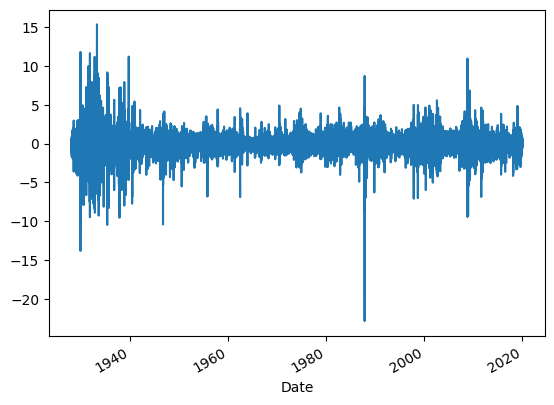

In [46]:
# shift function
print(SP_close[:3])
print(SP_close.shift()[:3])

SP_returns = np.log(SP_close/SP_close.shift()) * 100
print(SP_returns)
SP_returns.plot()